np ver: 1.18.5


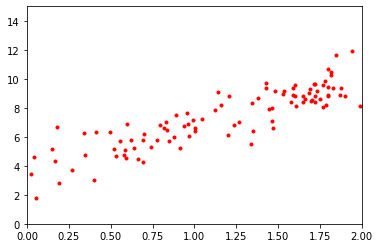

In [1]:
import matplotlib.pyplot as plt
import numpy as np
print ("np ver:",np.__version__)
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
plt.plot(X,y,'r.')
plt.axis([0,2,0,15])

plt.show()

### now let's use the normal equation to compute the linear regression values for theta
### $\theta=(X^TX)^{-1}X^Ty$

In [2]:
X_b=np.c_[np.ones((100,1)),X]
#we need this column to include X(0)=1, to include the bias term in θ
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.6146448],
       [3.1904639]])

### now let's see how this model works with one prediction:

In [4]:
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.6146448],
       [9.9955726]])

## Prediction plotted

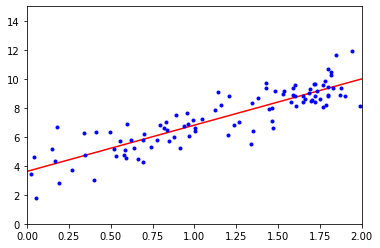

In [5]:
plt.plot(X_new,y_predict,"r-")
#since we have the prediction at the intercept and the model is linear the red line will identify each element in the interval
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# Let's try Linear Regression using Sci-kit learn

In [9]:
import sklearn
from sklearn.linear_model import LinearRegression
print (sklearn.__version__)
lin_reg=LinearRegression()
#Remember the parenthesis to recall the default constructor!
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ 


0.22.2.post1


(array([3.6146448]), array([[3.1904639]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.05925379],
       [10.20205667]])

### *The LinearRegression class is based on the Least Squares function scipy.linalg.lstsq()*

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.6146448],
       [3.1904639]])

### the algorithm is using the pseudo-inverse matrix, based on a *standard factorization technique* called **Singular Value Decomposition**.
Note that the complexity of SVD alg is lower than $(X^TX)^{-1}$ so it's usually preferred.

#Overall <font color="red">LinReg</font> is a good method and very quick once trained, but complexity is  high to train the model, so it is not used in cases of too many features or instances... 




# Suggestion: what about exploring the linear regression algorithm having 2 features x1,x2?
##this means changing the dimension of X, from (100,1) to (100,2) and all the rest of the project accordingly.


In [11]:
import numpy as np
import matplotlib.pyplot as plt
X=5*np.random.rand(100,2)
#l=np.random.randn(5,1)
#print (l)
y=4+2*X[:,[0]]+(5*X[:,[1]])+0.5*np.random.randn(100,1)
print(y.shape)

#print(y.size)
#print(k.size)
#print(X)
#X_b=np.c_[np.ones((100,1)),X]


(100, 1)


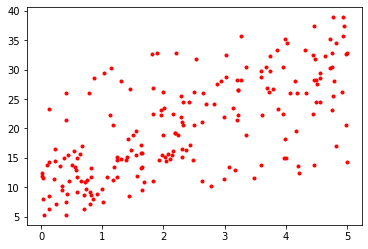

In [12]:

plt.plot(X,y,"r.")
plt.show()

### ok we need a 3d plot to better understand the data

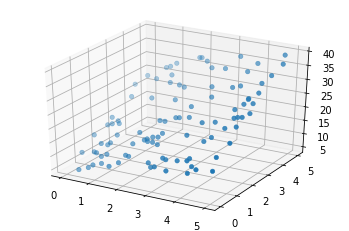

In [13]:


ax=plt.axes(projection='3d')
ax.scatter(X[:,[0]], X[:,[1]], y, cmap='viridis', linewidth=0.5);


As we expected we identified a plane, clearly identified by the 3D plot



### Here we can use the Linear Regression model from sklearn to predict the new labels.


In [14]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
#Remember the parenthesis to recall the default constructor!
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ 

(array([4.06144574]), array([[1.98768968, 5.05021236]]))

## note we have now 2 coefficients, so this means we are looking at a plane function like $z=ax+bx+c$, in our case:
## $z=x+5y+4$
### Bear in mind that now the elements to predict must have a feature structure based on **2 dimensions**.

In [18]:
X_new=np.array([[5,5],[0,0]])
print (X_new)
lin_reg.predict(X_new)

[[5 5]
 [0 0]]


array([[39.25095592],
       [ 4.06144574]])